In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from mpl_toolkits.mplot3d import Axes3D

In [2]:
import tensorflow

In [ ]:
data = pd.read_csv(r'C:\Users\thuyd\Desktop\bootcamp\Project 4\DNEdited_weekly_rigs_and_oil_price.csv')

d_time = data['Date'] #time
d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
d_price_Brent = data['Brent_Oil_Price']

data.set_index('Date',inplace = True)

train = data.iloc[30:,[0,2]]
test = data.iloc[0:30,[0,2]]
train = pd.DataFrame(train)
test = pd.DataFrame(test)

train.set_index('WTI_Oil_Price',inplace = True)
test.set_index('WTI_Oil_Price',inplace = True)

In [4]:
#data.head()
#train.head()
test

,Rigs_Count
Brent_Oil_Price,
45.26,254
44.79,254
44.54,244
44.36,247
43.22,251
43.57,251
43.40,253
43.06,258
42.30,263


C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

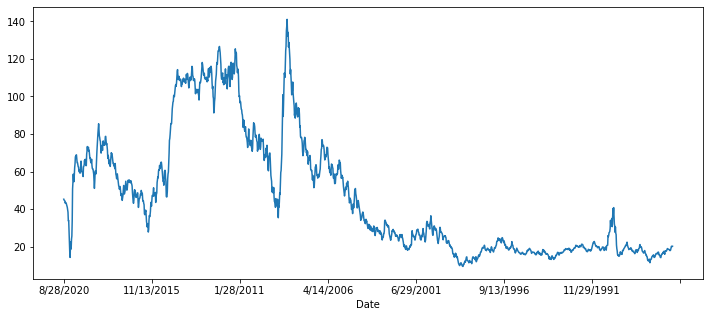

In [5]:
data['Brent_Oil_Price'].plot(figsize=(12,5))

C:\Users\thuyd\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

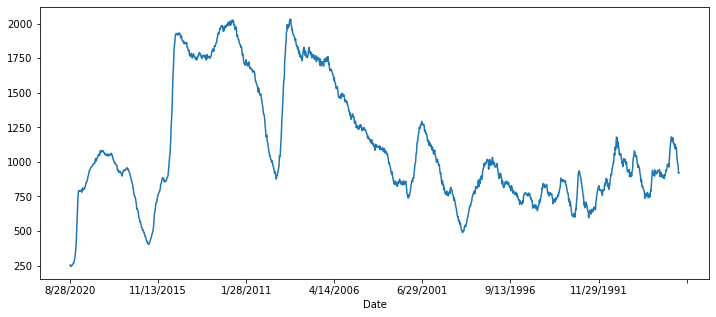

In [6]:
data['Rigs_Count'].plot(figsize=(12,5))

In [7]:
#Axes3D.scatter(d_price_WTI, d_rigs, zs=0, zdir='z', s=20, c=None, depthshade=True)

# d_time = data['Date'] #time
# d_rigs = data['Rigs_Count'] #rigs count column, y, index: 0
# d_price_WTI = data['WTI_Oil_Price'] #price column, x, index: 1
# d_price_Brent

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()#this is a must
scaler.fit(train)#scaler only takes dataframe intead of series

MinMaxScaler()

In [9]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

<AxesSubplot:>

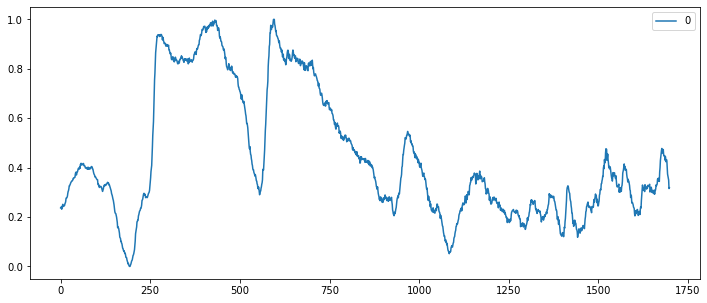

In [10]:
df_scaled_train = pd.DataFrame(scaled_train)
df_scaled_train.plot(figsize=(12,5))

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator #what is this

In [12]:
# define generator, equally spaced data rows
n_input = 20
n_features = 1
#batch size too large will overfit
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [13]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.23724647 0.23970498 0.24093423 0.23171481 0.24093423 0.24646589
 0.25138291 0.24277812 0.24277812 0.244622   0.24523663 0.24708052
 0.25384143 0.25691457 0.26183159 0.27473878 0.27781192 0.2771973
 0.28027044 0.28518746]
Predict this y: 
 [[0.29625077]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [15]:
n_input = 30
n_features = 1
#batch size too large will overfit
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [16]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences = True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 150)           91200     
_________________________________________________________________
dropout (Dropout)            (None, 30, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 150)           180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 150)           180600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 150)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               1

In [19]:
model.fit_generator(train_generator,epochs=100)

Epoch 1/100
1669/1669 [==============================] - 83s 50ms/step - loss: 0.0016
Epoch 2/100
1669/1669 [==============================] - 77s 46ms/step - loss: 0.0015
Epoch 3/100
1669/1669 [==============================] - 74s 44ms/step - loss: 0.0013
Epoch 4/100
1669/1669 [==============================] - 75s 45ms/step - loss: 0.0013
Epoch 5/100
1669/1669 [==============================] - 73s 44ms/step - loss: 0.0012
Epoch 6/100
1669/1669 [==============================] - 74s 44ms/step - loss: 0.0013
Epoch 7/100
1669/1669 [==============================] - 76s 45ms/step - loss: 0.0011
Epoch 8/100
1669/1669 [==============================] - 81s 49ms/step - loss: 0.0014
Epoch 9/100
1669/1669 [==============================] - 77s 46ms/step - loss: 0.0011
Epoch 10/100
1669/1669 [==============================] - 76s 46ms/step - loss: 0.0011 1s
Epoch 11/100
1669/1669 [==============================] - 79s 47ms/step - loss: 0.0010
Epoch 12/100
1669/1669 [=========================

1669/1669 [==============================] - 73s 44ms/step - loss: 5.1315e-04
Epoch 91/100
1669/1669 [==============================] - 74s 44ms/step - loss: 5.3004e-04
Epoch 92/100
1669/1669 [==============================] - 74s 44ms/step - loss: 5.2009e-04
Epoch 93/100
1669/1669 [==============================] - 74s 44ms/step - loss: 5.4673e-04
Epoch 94/100
1669/1669 [==============================] - 74s 44ms/step - loss: 5.4530e-04
Epoch 95/100
1669/1669 [==============================] - 73s 44ms/step - loss: 5.3243e-04
Epoch 96/100
1669/1669 [==============================] - 74s 44ms/step - loss: 4.9327e-04
Epoch 97/100
1669/1669 [==============================] - 73s 44ms/step - loss: 4.9449e-04
Epoch 98/100
1669/1669 [==============================] - 74s 44ms/step - loss: 5.1894e-04
Epoch 99/100
1669/1669 [==============================] - 73s 44ms/step - loss: 5.5736e-04
Epoch 100/100
1669/1669 [==============================] - 74s 44ms/step - loss: 4.4966e-04


In [20]:
model.history.history.keys()

dict_keys(['loss'])

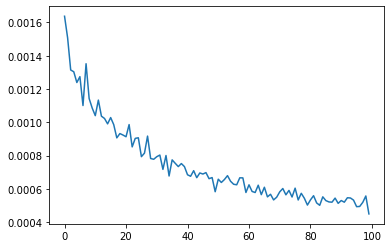

In [21]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

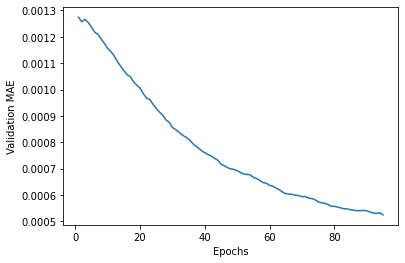

In [22]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(loss_per_epoch[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
# 10 history steps --> step 13
# last 10 points in train --> pt 1 in test data
first_eval_batch = scaled_train[-n_input:]

In [ ]:
first_eval_batch

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))# make it 3 dimensional

In [ ]:
model.predict(first_eval_batch)

In [ ]:
scaled_test[0]

In [24]:
test_predictions = []

# last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]

# reshape this to the format RNN wants(same format as TimeSeries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

#how far into the future will I forecast?
#len(test) -->I can also change to 24

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [25]:
test_predictions

[array([0.32419735], dtype=float32),
 array([0.32780087], dtype=float32),
 array([0.33019918], dtype=float32),
 array([0.33287817], dtype=float32),
 array([0.33735827], dtype=float32),
 array([0.34319854], dtype=float32),
 array([0.35000467], dtype=float32),
 array([0.35759887], dtype=float32),
 array([0.36595443], dtype=float32),
 array([0.37499034], dtype=float32),
 array([0.38449174], dtype=float32),
 array([0.39433712], dtype=float32),
 array([0.40446317], dtype=float32),
 array([0.41475722], dtype=float32),
 array([0.42503402], dtype=float32),
 array([0.43506354], dtype=float32),
 array([0.44461623], dtype=float32),
 array([0.45348525], dtype=float32),
 array([0.46149236], dtype=float32),
 array([0.4685456], dtype=float32),
 array([0.47457838], dtype=float32),
 array([0.4794947], dtype=float32),
 array([0.48323643], dtype=float32),
 array([0.48584378], dtype=float32),
 array([0.48746327], dtype=float32),
 array([0.48822898], dtype=float32),
 array([0.4882375], dtype=float32),
 arr

In [26]:
scaled_test

array([[-0.09219422],
       [-0.09219422],
       [-0.0983405 ],
       [-0.09649662],
       [-0.09403811],
       [-0.09403811],
       [-0.09280885],
       [-0.08973571],
       [-0.08666257],
       [-0.08543331],
       [-0.08481868],
       [-0.07682852],
       [-0.07375538],
       [-0.0633067 ],
       [-0.05285802],
       [-0.03995083],
       [-0.01843884],
       [ 0.00245851],
       [ 0.03749232],
       [ 0.07682852],
       [ 0.12169637],
       [ 0.15980332],
       [ 0.19913952],
       [ 0.22618316],
       [ 0.23847572],
       [ 0.23909035],
       [ 0.23724647],
       [ 0.23786109],
       [ 0.23724647],
       [ 0.23724647]])

In [27]:
true_predictions = scaler.inverse_transform(test_predictions)

In [28]:
true_predictions

array([[ 931.46909159],
       [ 937.3320154 ],
       [ 941.23406917],
       [ 945.59278649],
       [ 952.88189897],
       [ 962.38402104],
       [ 973.45760298],
       [ 985.81336311],
       [ 999.40785584],
       [1014.10928977],
       [1029.56806368],
       [1045.58649045],
       [1062.06158078],
       [1078.81000009],
       [1095.53034464],
       [1111.8483811 ],
       [1127.39060351],
       [1141.82050252],
       [1154.84806913],
       [1166.32366821],
       [1176.13902521],
       [1184.13786209],
       [1190.22567499],
       [1194.46782625],
       [1197.10273322],
       [1198.34854513],
       [1198.36241281],
       [1197.28247964],
       [1195.22860891],
       [1192.31154805]])

In [29]:
test['Predictions'] = true_predictions

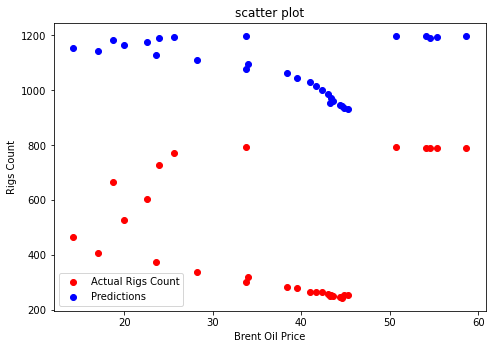

In [31]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
test_2 = test.reset_index()
ax.scatter(test_2['Brent_Oil_Price'], test_2['Rigs_Count'], color='r',label = "Actual Rigs Count")
ax.scatter(test_2['Brent_Oil_Price'], test_2['Predictions'], color='b', label = "Predictions")
ax.set_xlabel('Brent Oil Price')
ax.set_ylabel('Rigs Count')
ax.set_title('scatter plot')
plt.legend()
plt.show()

In [30]:
test

,Rigs_Count,Predictions
Brent_Oil_Price,,
45.26,254,931.469092
44.79,254,937.332015
44.54,244,941.234069
44.36,247,945.592786
43.22,251,952.881899
43.57,251,962.384021
43.40,253,973.457603
43.06,258,985.813363
42.30,263,999.407856
